In [151]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [152]:
#load train data and validation data
val = pd.read_csv("file:///Users/chenbo/Desktop/UCL/WebEconomics/coursework/dataset/validation.csv")
#train = pd.read_csv("file:///Users/chenbo/Desktop/UCL/WebEconomics/coursework/dataset/train.csv")
#test =pd.read_csv("file:///Users/chenbo/Desktop/UCL/WebEconomics/coursework/dataset/test.csv")

In [154]:
max(val.bidprice)

300

In [81]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag'],
      dtype='object')

In [150]:
slot_click =train.pivot_table(index=['slotwidth'],columns='slotheight',values='click',aggfunc=np.sum)
slot_impression =train.pivot_table(index=['slotwidth'],columns='slotheight',values='click',aggfunc='count')
slot_ctr = slot_click/slot_impression

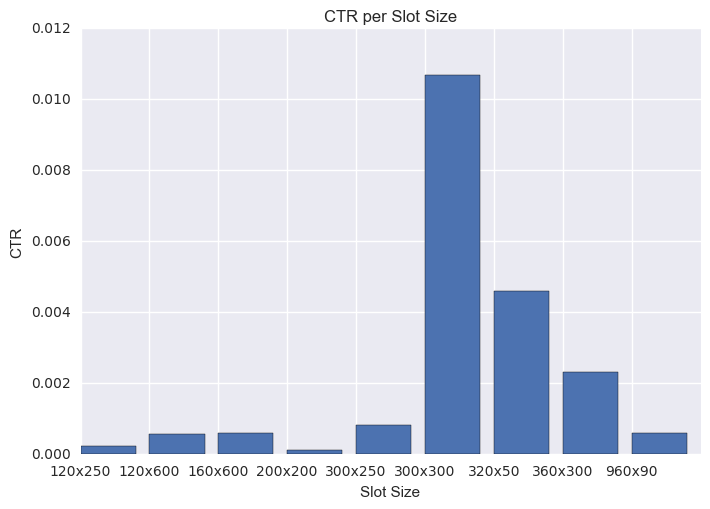

In [174]:
slotsize =['120x250','120x600','160x600','200x200','300x250','300x300','320x50','360x300','960x90']
ctr_slot =[0.000235,0.000578,0.000609,0.000136,0.000825,0.010676,0.004607,0.002326,0.000588]
index =[1,2,3,4,5,6,7,8,9]

plt.bar(index,ctr_slot)
plt.xticks(index, slotsize)
plt.xlabel('Slot Size')
plt.ylabel('CTR')
plt.title('CTR per Slot Size')

In [84]:
train.click.value_counts()

0    2695704
1       2034
Name: click, dtype: int64

In [193]:
advertiser_click =val.pivot_table(index=['advertiser'],values='click',aggfunc=np.sum)
advertiser_impression =val.pivot_table(index=['advertiser'],values='click',aggfunc='count')
advertiser_cost =val.pivot_table(index=['advertiser'],values='payprice',aggfunc='sum')

In [194]:
advertiser_ctr = advertiser_click/advertiser_impression
advertiser_cpm = advertiser_cost/advertiser_impression
advertiser_cpc = (advertiser_cost/advertiser_click)/1000

In [202]:
advertiser_cpc

advertiser
1458     82.783700
2259    138.150636
2261    239.249800
2821    142.590750
2997     14.899385
3358    115.771815
3386    128.953515
3427     90.609622
3476    235.581000
dtype: float64

In [100]:
heat = day_click/day_impression

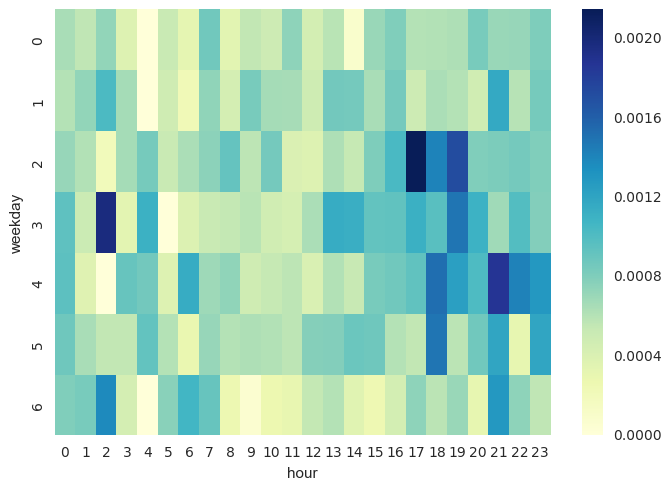

In [114]:
import seaborn as sb

ax = sb.heatmap(heat,cmap="YlGnBu")

In [115]:
city_click =train.pivot_table(index=['city'],values='click',aggfunc=np.sum)
city_impression =train.pivot_table(index=['city'],values='click',aggfunc='count')
city_ctr = city_click/city_impression

In [136]:
sorted(city_ctr,reverse=True)

[0.013513513513513514,
 0.004608294930875576,
 0.0038022813688212928,
 0.0030120481927710845,
 0.0025157232704402514,
 0.0025000000000000001,
 0.002277163305139883,
 0.0022598870056497176,
 0.0021289537712895377,
 0.0020920502092050207,
 0.0019801980198019802,
 0.0019665683382497543,
 0.001953125,
 0.0018796992481203006,
 0.0018467220683287165,
 0.0018170805572380376,
 0.0018104632288675241,
 0.0018055973517905506,
 0.0017761989342806395,
 0.0017605633802816902,
 0.001758312020460358,
 0.0017101325352714834,
 0.0016666666666666668,
 0.001639344262295082,
 0.0016233766233766235,
 0.0016124697661918839,
 0.0015813401858074719,
 0.0015497869043006587,
 0.0015376013419066256,
 0.0015345268542199489,
 0.0015157256536566881,
 0.0014940239043824701,
 0.001452960406828914,
 0.0014471780028943559,
 0.001443522194153735,
 0.0014388489208633094,
 0.0014367816091954023,
 0.0014316392269148174,
 0.0013953488372093023,
 0.0013888888888888889,
 0.0013784954706577393,
 0.0013745704467353953,
 0.001360

In [125]:
len(city_ctr)

370

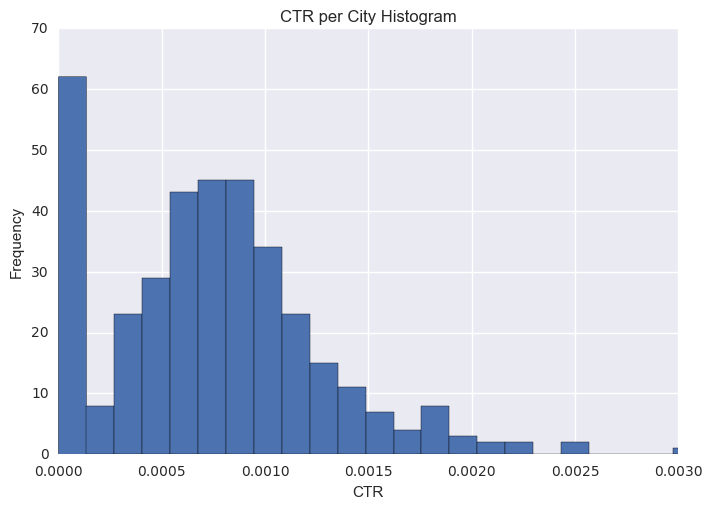

In [132]:
import seaborn
city_ctr.plot(kind='hist',bins=100,xlim=(0,0.003))
plt.xlabel('CTR')
plt.title('CTR per City Histogram')

In [3]:
#用做index的栏
col = ['userid','useragent','IP','domain','url','slotid','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','usertag','adexchange']

train_in = train[col]
val_in = val[col]
test_in = test[col]

In [4]:
len(train_in),len(val_in),len(test_in)

(2697738, 299749, 299749)

In [5]:
combine = pd.concat([train_in,val_in,test_in])

In [6]:
len(combine)

3297236

In [7]:
def index_pre(a_list):
    userid_n = []
    userid_d = {}
    index = 1

    for user in a_list:
        if user in userid_d.keys():
            userid_n.append(userid_d[user])
        else:
            userid_d[user] = index
            userid_n.append(userid_d[user])
            index += 1
    return userid_n

In [8]:
userid_number = index_pre(combine['userid'])
useragent_number = index_pre(combine['useragent'])
ip_number = index_pre(combine['IP'])
domain_number = index_pre(combine.domain)
url_number = index_pre(combine.url)
slotid_number = index_pre(combine.slotid)
slotwidth_number = index_pre(combine.slotwidth)
slotheight_number = index_pre(combine.slotheight)
slotvisibility_number = index_pre(combine.slotvisibility)
slotformat_number = index_pre(combine.slotformat)
creative_number = index_pre(combine.creative)
keypage_number = index_pre(combine.keypage)
adexchange_number = index_pre(combine.adexchange)

In [9]:
combine_index =  pd.DataFrame(
    {'userid':userid_number,
    'useragent':useragent_number,
    'IP':ip_number,
    'domain':domain_number,
    'url':url_number,
    'slotid':slotid_number,
    'slotwidth':slotwidth_number,
    'slotheight':slotheight_number,
    'slotvisibility':slotvisibility_number,
    'slotformat':slotformat_number,
    'creative':creative_number,
    'keypage':keypage_number,
    'adexchange':adexchange_number}
    )

In [10]:
len(combine_index)

3297236

In [11]:
tags= []
for usertag in combine.usertag:
    for tag in usertag.split(','):
        if tag not in tags:
            tags.append(tag)

In [12]:
L = []
for t in tags:
    s = 'L'+t
    L.append(s)

In [14]:
len(L)

69

In [13]:
for i,t in enumerate(tags):
    L[i]= []
    for string in combine.usertag:
        if string.find(t) < 0:
            L[i].append(0)
        else:
            L[i].append(1)

In [15]:
df_tags = pd.DataFrame()
for i in range(0,69):
    se = pd.Series(L[i])
    df_tags['tag'+str(i)] = se.values

In [16]:
index_data = pd.concat([combine_index, df_tags], axis=1)

# 做好的combine index 分出来

In [17]:
index_train = index_data[:2697738]
index_val = index_data[2697738:2697738 +299749]
index_test = index_data[2697738 +299749:]

In [18]:
len(index_data)

3297236

In [19]:
len(index_train),len(index_val),len(index_test)

(2697738, 299749, 299749)

In [20]:
index_train['click'] = pd.Series(train.click).values
index_train['weekday'] = pd.Series(train.weekday).values
index_train['hour'] = pd.Series(train.hour).values
index_train['region'] = pd.Series(train.region).values
index_train['city'] = pd.Series(train.city).values
#index_train['adexchange'] = pd.Series(train.adexchange).values
index_train['slotprice'] = pd.Series(train.slotprice).values
index_train['bidprice'] = pd.Series(train.bidprice).values
index_train['payprice'] = pd.Series(train.payprice).values
index_train['advertiser'] = pd.Series(train.advertiser).values


/Users/chenbo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/chenbo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/chenbo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [21]:
index_val['click'] = pd.Series(val.click).values
index_val['weekday'] = pd.Series(val.weekday).values
index_val['hour'] = pd.Series(val.hour).values
index_val['region'] = pd.Series(val.region).values
index_val['city'] = pd.Series(val.city).values
#index_val['adexchange'] = pd.Series(val.adexchange).values
index_val['slotprice'] = pd.Series(val.slotprice).values
index_val['bidprice'] = pd.Series(val.bidprice).values
index_val['payprice'] = pd.Series(val.payprice).values
index_val['advertiser'] = pd.Series(val.advertiser).values


/Users/chenbo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/chenbo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/chenbo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [22]:
index_test['weekday'] = pd.Series(test.weekday).values
index_test['hour'] = pd.Series(test.hour).values
index_test['region'] = pd.Series(test.region).values
index_test['city'] = pd.Series(test.city).values
#index_test['adexchange'] = pd.Series(test.adexchange).values
index_test['slotprice'] = pd.Series(test.slotprice).values
index_test['advertiser'] = pd.Series(test.advertiser).values


/Users/chenbo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/chenbo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/chenbo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [23]:
index_test.to_csv('test_index.csv')
index_train.to_csv('train_index.csv')
index_val.to_csv('val_index.csv')

In [24]:
len(index_test),len(index_val),len(index_train)

(299749, 299749, 2697738)

In [121]:
new_train =  pd.DataFrame(
    {'click':train.click,
    'weekday':train.weekday,
    'hour':train.hour,
    'userid':userid_number,
    'useragent':useragent_number,
    'IP':ip_number,
    'region':train.region,
    'city':train.city,
    'adexchange':train.adexchange,
    'domain':domain_number,
    'url':url_number,
    'slotid':slotid_number,
    'slotwidth':slotwidth_number,
    'slotheight':slotheight_number,
    'slotvisibility':slotvisibility_number,
    'slotformat':slotformat_number,
    'slotprice':train.slotprice,
    'creative':creative_number,
    'bidprice':train.bidprice,
    'payprice':train.payprice,
    'keypage':keypage_number,
    'advertiser':train.advertiser}
    )

In [94]:
test_list = index_test.values.tolist()

In [3]:
from scipy.sparse import hstack
def ctr_estimate(data_train,data_test):
    train_label=data_train['click']
    test_label=data_test['click']
    train_set1= data_train.drop('click', 1)
    train_set2 = train_set1.fillna(0)
    test_set1=data_test.drop('click',1)
    test_set2 = test_set1.fillna(0)
    train_set = train_set2.values.tolist()
    test_set = test_set2.values.tolist()
    
    return train_set , test_set,train_label,test_label
    #del whole,user_tag_train,user_tag_test
    

# 把存好的table读进来

In [4]:
index_train = pd.read_csv('train_index.csv')
index_val = pd.read_csv('val_index.csv')
index_test = pd.read_csv('test_index.csv')

In [5]:
train_set,test_set,train_label,test_label =ctr_estimate(index_train,index_val)

In [6]:

import sklearn.linear_model as lm
lg = lm.LogisticRegression(C=1,penalty='l2')
model=lg.fit(train_set,train_label)
    #model=knn.fit(train_set,train_label)
    #model=svm.fit(train_set,train_label)
    #model=lg.fit(train_set,train_label)

In [18]:
predicted= model.predict_proba(test_set)
predicted= model.predict(test_set)

In [8]:
predicted1=[el[1] for el in predicted]

In [182]:
# 逻辑回归的 CTR
logistic_reg 
predicted1_svm
tree

In [202]:
len(logistic_reg)

299749

In [261]:
import numpy as np
average_ctr = sum(val.click)/len(val)
def lin (pctr,base):
    bid=base*pctr/average_ctr
    return bid

In [275]:
a=[]

for i in range(1,400):
    bids=[]
    for q in logistic_reg:
        bids.append(lin(q,i))
    a.append(bids)

In [263]:
len(a)

120

In [276]:
b=[]

for i in range(1,400):
    bids=[]
    for q in predicted1_svm:
        bids.append(lin(q,i))
    b.append(bids)

In [277]:
c=[]

for i in range(1,400):
    bids=[]
    for q in tree:
        bids.append(lin(q,i))
    c.append(bids)

In [266]:
def validation(bidding):
    new= val.assign(bidding = bidding, diff= bidding -val['payprice'])
    new= new[new['diff'] >= 0]
    clicks =sum(new['click'])
    ctr= clicks/len(new)
    spend = sum(new['payprice'])/1000
    cpc = spend/clicks
    x=0
    return [ctr,spend,cpc,x,clicks]
    

In [278]:
result_lg =[] 
for ai in a:
    result_lg.append(validation(ai))

result_svm =[] 
for bi in b:
    result_svm.append(validation(bi))
    
result_tree =[] 
for ci in c:
    result_tree.append(validation(ci))

In [279]:
def split(l):
    lg_ctr=[]
    lg_spend=[]
    lg_cpc =[]
    lg_clicks =[]
    for ll in l:
        lg_ctr.append(ll[0])
        lg_spend.append(ll[1])
        lg_cpc.append(ll[2])
        lg_clicks.append(ll[4])
    return lg_ctr,lg_spend,lg_cpc,lg_clicks


In [280]:
lg_ctr,lg_spend,lg_cpc,lg_clicks =split(result_lg)

In [281]:
svm_ctr,svm_spend,svm_cpc,svm_clicks =split(result_svm)

In [282]:
tree_ctr,tree_spend,tree_cpc,tree_clicks =split(result_tree)

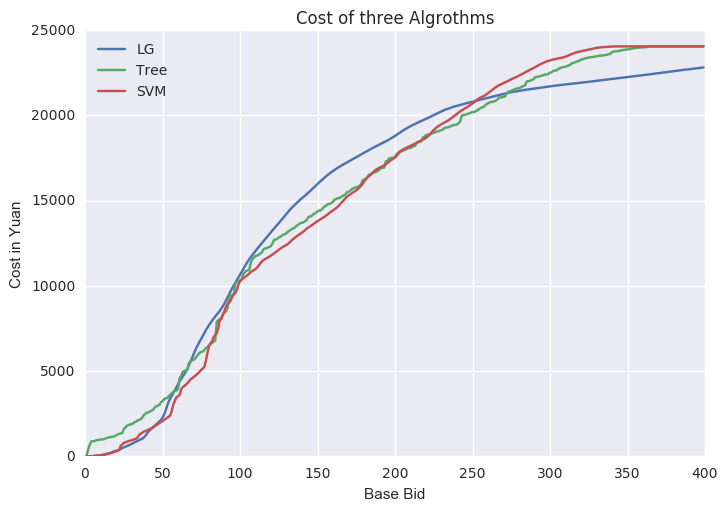

In [302]:
x= range(1,400,1)

plt.plot(x,lg_spend)
plt.plot(x,tree_spend)
plt.plot(x,svm_spend)
plt.legend(['LG','Tree','SVM'],loc=2)
plt.title('Cost of three Algrothms')
plt.xlabel('Base Bid')
plt.ylabel('Cost in Yuan')

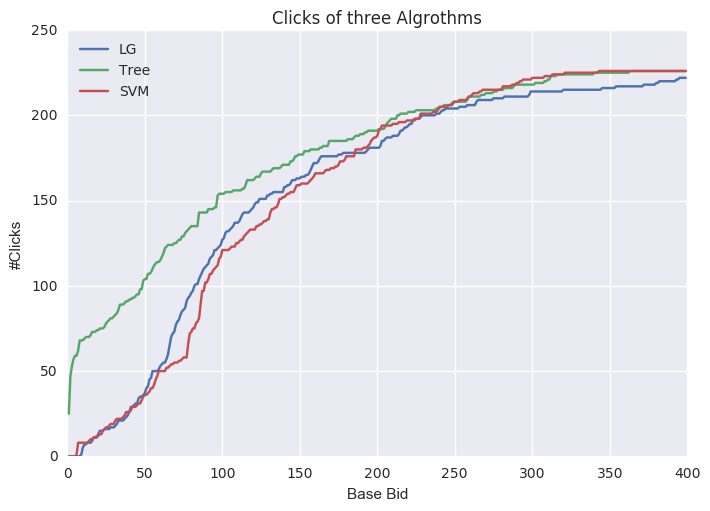

In [301]:
x= range(1,400,1)

plt.plot(x,lg_clicks)
plt.plot(x,tree_clicks)
plt.plot(x,svm_clicks)
plt.legend(['LG','Tree','SVM'],loc=2)
plt.title('Clicks of three Algrothms')
plt.xlabel('Base Bid')
plt.ylabel('#Clicks')

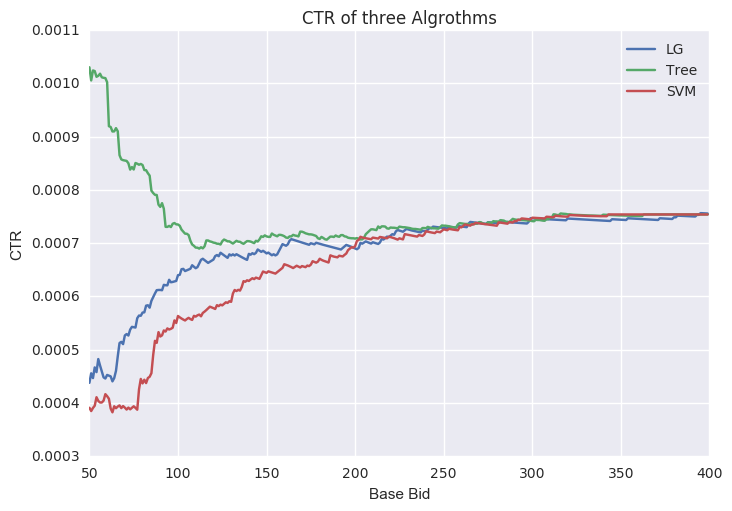

In [300]:
x= range(50,400,1)

plt.plot(x,lg_ctr[49:])
plt.plot(x,tree_ctr[49:])
plt.plot(x,svm_ctr[49:])
plt.legend(['LG','Tree','SVM'],loc=0)
plt.title('CTR of three Algrothms')
plt.xlabel('Base Bid')
plt.ylabel('CTR')

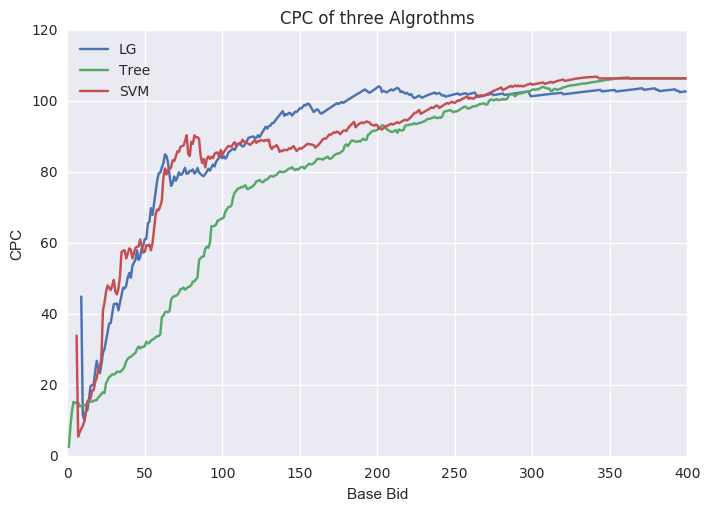

In [303]:
x= range(1,400,1)

plt.plot(x,lg_cpc)
plt.plot(x,tree_cpc)
plt.plot(x,svm_cpc)
plt.legend(['LG','Tree','SVM'],loc=0)
plt.title('CPC of three Algrothms')
plt.xlabel('Base Bid')
plt.ylabel('CPC')

In [244]:
len(lg_clicks)

240

In [185]:
tree_ctr = pd.read_csv('tree_ctr.csv')

In [186]:
tree_ctr

,Unnamed: 0,ctr
0,0,0.000625
1,1,0.000625
2,2,0.000625
3,3,0.000625
4,4,0.057368
5,5,0.001186
6,6,0.000625
7,7,0.000625
8,8,0.000625
9,9,0.001186


In [39]:
result_randam_f= []
for c in range(30,80):
    bid_price= non_lin(c,predicted1)
    re = validation_budget(bid_price,12500)
    result_randam_f.append(re)
    
clicks =[]
spend = []

for r in result_randam_f:
    clicks.append(r[4])
    spend.append(r[1])
    


In [60]:
bid_price

294738.4464110128

In [76]:
bid_price=[]
for p in predicted1:
    bid_price.append(lin(p,1000))
re = validation_budget(bid_price,6250)
re

[0.00096819840619646977,
 1562.0060000000001,
 60.077153846153848,
 0.058166604602666275,
 26]

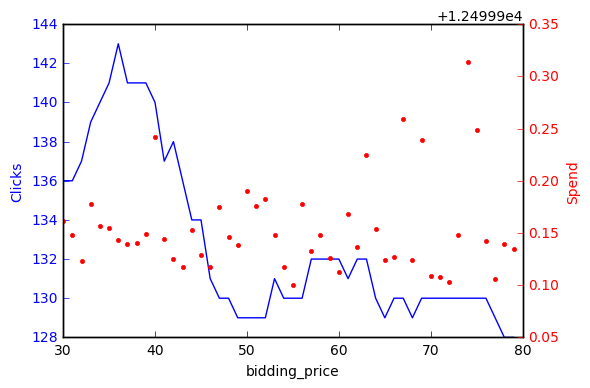

In [40]:
fig, ax1 = plt.subplots()
x = range(30,80,1)

ax1.plot(x, clicks, 'b-')
ax1.set_xlabel('bidding_price')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(x, spend, 'r.')
ax2.set_ylabel('Spend', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [41]:
max(clicks)

143

In [65]:
import numpy as np
def lin (pctr,base):
    bid=base*pctr/0.0067856773500495418
    return bid

In [51]:
sum(train_label)/len(test_label)

0.0067856773500495418

(array([ 52447.,  40097.,  65638.,  78201.,  43341.,  11419.,   4740.,
          2298.,   1378.,    190.]),
 array([ 0.0001043 ,  0.00031507,  0.00052584,  0.00073662,  0.00094739,
         0.00115816,  0.00136893,  0.0015797 ,  0.00179048,  0.00200125,
         0.00221202]),
 <a list of 10 Patch objects>)

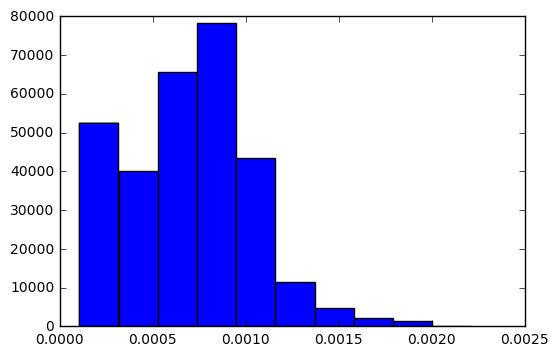

In [45]:
plt.hist(predicted1)

In [1]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn import ensemble
import scipy as sp
import sklearn as sk

svm=CalibratedClassifierCV(sk.svm.SVC(kernel='rbf',C=12))

#knn=CalibratedClassifierCV(sk.neighbors.KNeighborsClassifier(n_neighbors=4))

g_boosting=ensemble.GradientBoostingRegressor()

In [48]:
g_boosting=ensemble.GradientBoostingRegressor(max_depth=5,learning_rate=0.05,n_estimators=50)


In [53]:
import scipy 
#train_set=train_set.todense()
#test_set=test_set.todense()
boosting_model=g_boosting.fit(train_set,train_label)


AttributeError: 'list' object has no attribute 'todense'

In [121]:
import sklearn.ensemble as se

In [122]:
randam_f = se.RandomForestRegressor().fit(train_set,train_label)
predicted_randam_f = randam_f.predict(test_set)

In [149]:
bid_price= non_lin(50,predicted_randam_f)
re = validation_budget(bid_price,12500)
re

[0.0010366489975604193,
 8253.7950000000001,
 55.025300000000001,
 0.057041922085461341,
 150]

[0.00077505756604887368,
 13156.76,
 76.492790697674423,
 0.059286316178425461,
 172]

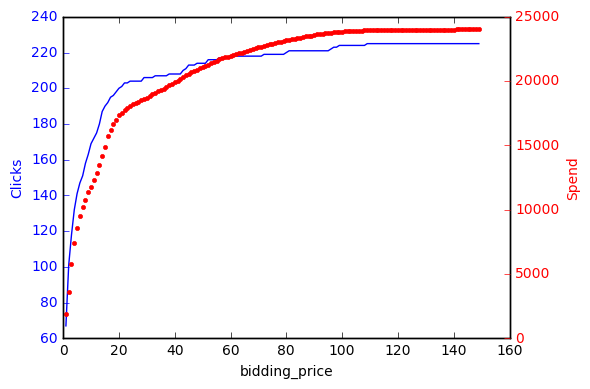

In [75]:
result_randam_f= []
for c in range(1,150,1):
    bid_price= non_lin(c,predicted_boosting)
    re = validation_budget(bid_price,25000)
    result_randam_f.append(re)
    
clicks =[]
spend = []

for r in result_randam_f:
    clicks.append(r[4])
    spend.append(r[1])
    


In [ ]:
fig, ax1 = plt.subplots()
x = range(1,350,1)

ax1.plot(x, clicks, 'b-')
ax1.set_xlabel('bidding_price')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(x, spend, 'r.')
ax2.set_ylabel('Spend', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [76]:
max(clicks)

225

In [56]:
predicted_boosting = boosting_model.predict(test_set)

In [119]:
result_svm= []
for c in range(1,400,1):
    bid_price= non_lin(c,predicted1_svm)
    re = validation_budget(bid_price,25000)
    result_svm.append(re)
    
clicks =[]
spend = []

for r in result_svm:
    clicks.append(r[4])
    spend.append(r[1])

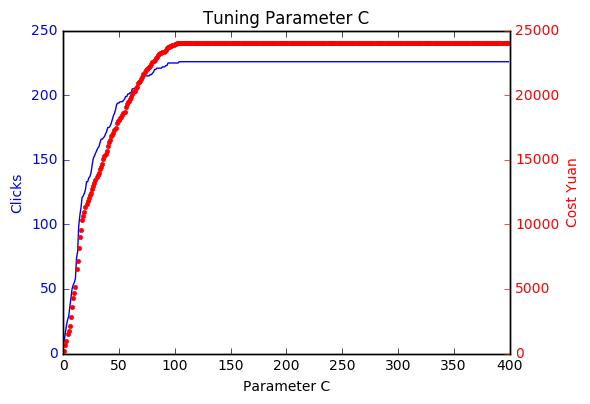

In [120]:
fig, ax1 = plt.subplots()
x = range(1,400,1)

ax1.plot(x, clicks, 'b-')
ax1.set_xlabel('Parameter C')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()

ax2.plot(x, spend, 'r.')
ax2.set_ylabel('Cost Yuan', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Tuning Parameter C')
plt.show()

In [105]:
max(clicks)

29

In [78]:
from sklearn import svm
svc = CalibratedClassifierCV(svm.LinearSVC(penalty='l2', C=0.3,class_weight='balanced')).fit(train_set, train_label)

predicted_svm = svc.predict_proba(test_set)
predicted1_svm=[el[1] for el in predicted_svm]

In [184]:
predicted1_svm

[0.00069322359454270703,
 0.00067262280488898174,
 0.00067944568370092529,
 0.00067837488080818836,
 0.0006733096039120602,
 0.00067754903938641844,
 0.00067320884173721976,
 0.00067187748486697424,
 0.00067703733661611651,
 0.00067993746020633,
 0.00066686043423418737,
 0.00067663367257711699,
 0.00068152025778709139,
 0.00067091424057215355,
 0.00067434092740136246,
 0.00067167054423448135,
 0.00066740299486012841,
 0.0006809881695997187,
 0.00068119682752269004,
 0.00069241449062162289,
 0.00067994987943284296,
 0.00067188865503155411,
 0.00067735976491680675,
 0.0006831796808586917,
 0.00069369261522138901,
 0.00066841681484961629,
 0.00067888747369487681,
 0.00068161439427847194,
 0.00067899835623235546,
 0.00068529821223643642,
 0.00067423430296862979,
 0.00069186331313083281,
 0.00067779945831582201,
 0.00069678655086650044,
 0.00067817714608730498,
 0.00067912041829821265,
 0.00066615330122274071,
 0.00068947805877824441,
 0.00066391779505088784,
 0.00067568570711925657,
 0.000

(array([  6.00000000e+00,   8.08800000e+03,   4.75250000e+04,
          1.08540000e+05,   9.30040000e+04,   3.47130000e+04,
          5.74100000e+03,   1.45200000e+03,   6.16000000e+02,
          6.40000000e+01]),
 array([ 0.00064462,  0.00065237,  0.00066011,  0.00066785,  0.00067559,
         0.00068334,  0.00069108,  0.00069882,  0.00070656,  0.00071431,
         0.00072205]),
 <a list of 10 Patch objects>)

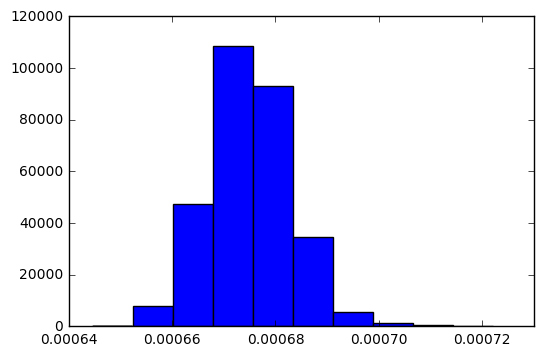

In [79]:
plt.hist(predicted1_svm)

In [90]:
#线性回归
sk.metrics.mean_squared_error(test_label,predicted1_svm)


0.00075340021063970044

In [91]:
#线性回归
sk.metrics.roc_auc_score(test_label,predicted1_svm)

0.50038353755332332

In [100]:
def GetRates(actives, scores):

    tpr = [0.0]  # true positive rate
    fpr = [0.0]  # false positive rate
    nractives = len(actives)
    nrdecoys = len(scores) - len(actives)

    foundactives = 0.0
    founddecoys = 0.0
    for idx, (id, score) in enumerate(scores):
        if id in actives:
            foundactives += 1.0
        else:
            founddecoys += 1.0

        tpr.append(foundactives / float(nractives))
        fpr.append(founddecoys / float(nrdecoys))

    return tpr, fpr

In [98]:
import scikitplot.plotters as skplt
import matplotlib.pyplot as plt

y_true = test_label
y_probas = predicted1_svm
plt.plot_roc_curve(y_true, y_probas)
plt.show()

ImportError: No module named 'scikitplot'

### plt.hist(predicted)

In [65]:
index_val.click.value_counts()

0    299523
1       226
Name: click, dtype: int64

In [6]:
import collections as c

def index_pre(a_list):
    userid_n = []
    userid_d = c.defaultdict()
    index = 1

    for user in a_list:
        if user in userid_d.keys():
            userid_n.append(userid_d[user])
        else:
            userid_d[user] = index
            userid_n.append(userid_d[user])
            index += 1
    return userid_n,userid_d

        

In [74]:
tags= []
for usertag in train.usertag:
    for tag in usertag.split(','):
        if tag not in tags:
            tags.append(tag)
    

In [105]:
L = []
for t in tags:
    s = 'L'+t
    L.append(s)

In [106]:
for i,t in enumerate(tags):
    L[i]= []
    for string in train.usertag:
        if string.find(t) < 0:
            L[i].append(0)
        else:
            L[i].append(1)

In [118]:
df= pd.DataFrame()
for i in range(0,69):
    se = pd.Series(L[i])
    df['tag'+str(i)] = se.values

In [153]:
# validation function

def validation(bidding):
    new= val.assign(bidding = bidding, diff= bidding -val['payprice'])
    new= new[new['diff'] >= 0]
    clicks =sum(new['click'])
    ctr= clicks/len(new)
    spend = sum(new['payprice'])/1000
    cpc = spend/clicks
    cpm = spend/len(new)
    return [ctr,spend,cpc,cpm,clicks]
    

In [10]:
def non_lin(c,predict):
    lam= 5.2e-7
    bid_price = []
    for ctr in predict:
        #biding_p=c*((((ctr+np.sqrt(c**2*lam**2+ctr**2))/c*lam)**(1/3))-((c*lam/(ctr+np.sqrt(c**2*lam**2+ctr**2)))**(1/3)))
        b= c*(((ctr + np.sqrt(c**2 * lam**2 +ctr**2))/(c*lam))**(1/3)) - (((c*lam)/(ctr + np.sqrt(c**2 * lam**2 +ctr**2))) ** (1/3))
        bid_price.append(b)
    return bid_price

In [66]:
result_svm= []
for c in range(1,150,1):
    bid_price= non_lin(c,predicted1_svm)
    re = validation_budget(bid_price,25000)
    result_svm.append(re)
    
clicks =[]
spend = []

for r in result_svm:
    clicks.append(r[4])
    spend.append(r[1])

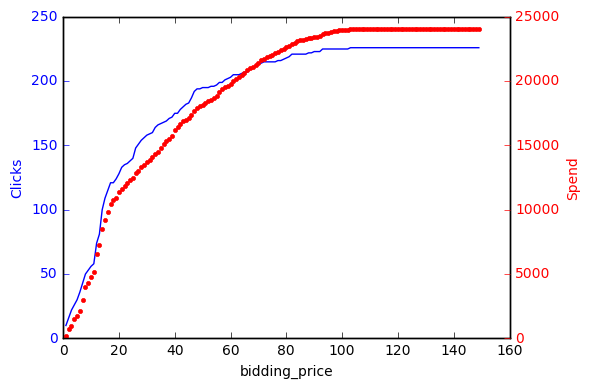

In [72]:

fig, ax1 = plt.subplots()
x = range(1,150,1)

ax1.plot(x, clicks, 'b-')
ax1.set_xlabel('bidding_price')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(x, spend, 'r.')
ax2.set_ylabel('Spend', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [70]:
clicks

[10,
 16,
 22,
 26,
 30,
 36,
 43,
 50,
 53,
 56,
 58,
 74,
 81,
 100,
 109,
 115,
 121,
 121,
 124,
 128,
 133,
 135,
 136,
 138,
 140,
 148,
 151,
 154,
 156,
 158,
 159,
 160,
 164,
 166,
 167,
 168,
 169,
 171,
 172,
 175,
 175,
 178,
 180,
 182,
 183,
 187,
 192,
 194,
 194,
 195,
 195,
 195,
 196,
 196,
 197,
 199,
 199,
 201,
 202,
 203,
 205,
 205,
 205,
 206,
 207,
 207,
 209,
 210,
 212,
 213,
 214,
 215,
 215,
 215,
 215,
 215,
 216,
 216,
 217,
 218,
 219,
 221,
 221,
 221,
 221,
 221,
 221,
 222,
 222,
 223,
 223,
 223,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226]

In [17]:
result= []
for c in range(25,100,1):
    bid_price= non_lin(c)
    re = validation(bid_price)
    result.append(re)
   

In [18]:
clicks =[]
spend = []

for r in result:
    clicks.append(r[4])
    spend.append(r[1])

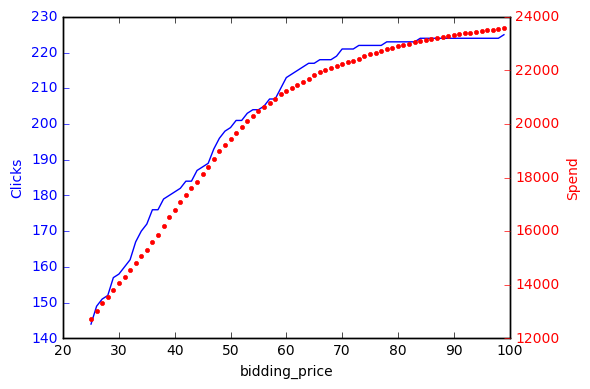

In [65]:

fig, ax1 = plt.subplots()
x = range(25,100,1)

ax1.plot(x, clicks, 'b-')
ax1.set_xlabel('bidding_price')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(x, spend, 'r.')
ax2.set_ylabel('Spend', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [13]:
def validation_budget(bidding,budget):
    new= val.assign(bidding = bidding, diff= bidding -val['payprice'])
    new= new[new['diff'] >= 0]
    cost= 0
    index= 0
    for pay in new.payprice:
        cost= pay + cost
        index += 1
        if cost/1000 >= budget:
            break
        
    
    clicks =sum(new['click'][:index])
    ctr= clicks/index
    spend = sum(new['payprice'][:index])/1000
    cpc = spend/clicks
    cpm = spend/index
    return [ctr,spend,cpc,cpm,clicks]
    

In [34]:
bid_price= non_lin(60)
re = validation_budget(bid_price,25000)

In [ ]:
b

In [35]:
re

[0.00074032880330888746,
 21237.634999999998,
 99.707206572769948,
 0.073816116923290806,
 213]

In [32]:
result= []
for c in range(1,100,1):
    bid_price= non_lin(c)
    re = validation_budget(bid_price,25000)
    result.append(re)
    
clicks =[]
spend = []

for r in result:
    clicks.append(r[4])
    spend.append(r[1])

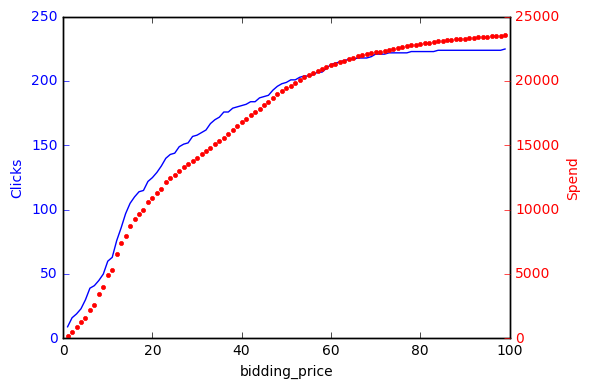

In [33]:

fig, ax1 = plt.subplots()
x = range(1,100,1)

ax1.plot(x, clicks, 'b-')
ax1.set_xlabel('bidding_price')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(x, spend, 'r.')
ax2.set_ylabel('Spend', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [61]:
result

[0.00075488410012782708,
 23589.347000000002,
 104.84154222222223,
 0.079143213256435807,
 225]

# Constant

In [95]:
# performance of 6 moments

min_ctr=validation([2.270000e+02] * len(val))
print(min_ctr)
first_q_ctr = validation([2.410000e+02] * len(val))
print(first_q_ctr)
median_ctr = validation([2.940000e+02] * len(val))
print(median_ctr)
mean_ctr = validation([2.724582e+02] * len(val))
print(mean_ctr)
third_q_ctr = validation([3.000000e+02] * len(val))
print(third_q_ctr)
max_ctr = validation([3.000000e+02] * len(val))
print(max_ctr)


[0.0011122763530047352, 7143.009, 204.08597142857144, 0.22700000000000001, 35]
[0.00077607995721072664, 22422.695, 303.00939189189188, 0.23515951589390777, 74]
[0.00077495014306771875, 47089.040000000001, 329.293986013986, 0.25518642157287785, 143]
[0.00069064701437358312, 29398.652999999998, 345.8665058823529, 0.23887166965947038, 85]
[0.00075396415000550463, 81655.339999999997, 361.306814159292, 0.27241238502880744, 226]
[0.00075396415000550463, 81655.339999999997, 361.306814159292, 0.27241238502880744, 226]


In [155]:
constants= []
for i in range(227,300):
    constants.append(validation(i))  
    

In [157]:
clicks=[]
spend=[]
for constant in constants:
    clicks.append(constant[4])
    spend.append(constant[1])
    

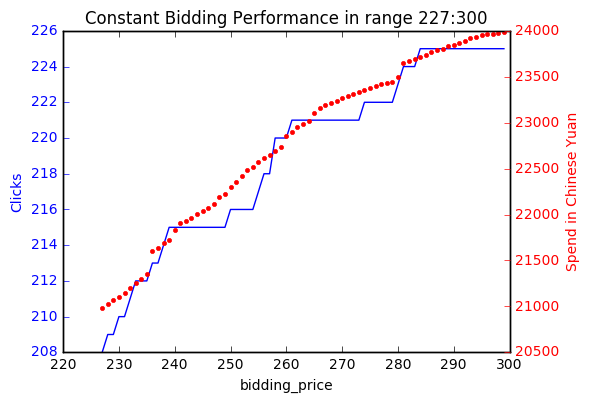

In [160]:
#plt.plot(range(227,300,1),ctr,'bs', range(227,300,1), spend, 'g^')



fig, ax1 = plt.subplots()
x = range(227,300,1)

ax1.plot(x, clicks, 'b-')
ax1.set_xlabel('bidding_price')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(x, spend, 'r.')
ax2.set_ylabel('Spend in Chinese Yuan', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Constant Bidding Performance in range 227:300')
plt.show()

(array([ 28.,   9.,   8.,  17.,   0.,   0.,   0.,   0.,   0.,  11.]),
 array([ 0.00069065,  0.00073281,  0.00077497,  0.00081714,  0.0008593 ,
         0.00090146,  0.00094362,  0.00098579,  0.00102795,  0.00107011,
         0.00111228]),
 <a list of 10 Patch objects>)

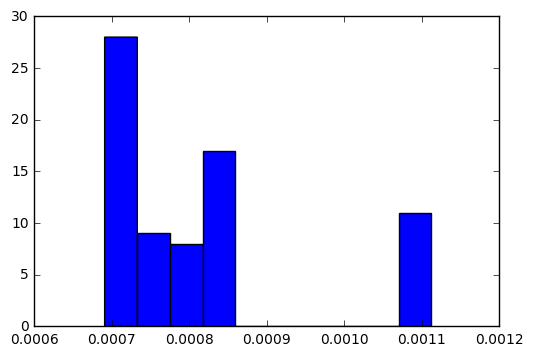

In [109]:
plt.hist(ctr)

# Random

In [165]:
import random

random_list= []

for i in range(0,100):
    random_list.append([random.choice(range(227,300,1)) for _ in range(len(val))])
  

In [166]:
output_random =[]
for ran in random_list:
    output_random.append(validation(ran))

In [170]:
ctr_=[]
cost=[]
clicks =[]
cpc=[]
for out in output_random:
    ctr.append(out[0])
    cost.append(out[1])
    cpc.append(out[2])
    clicks.append(out[4])

(array([  1.,   0.,   5.,  11.,  15.,  25.,  17.,  14.,  11.,   1.]),
 array([ 214. ,  214.9,  215.8,  216.7,  217.6,  218.5,  219.4,  220.3,
         221.2,  222.1,  223. ]),
 <a list of 10 Patch objects>)

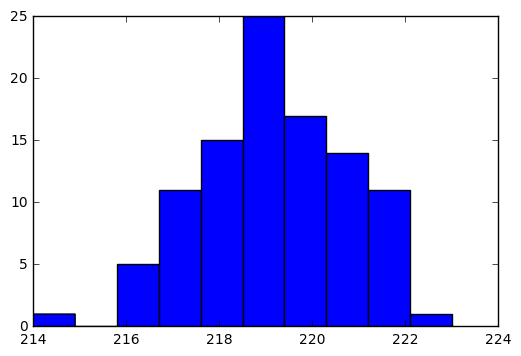

In [168]:
plt.hist(clicks)

(array([  4.,   0.,   3.,  16.,  15.,  19.,  23.,   9.,   9.,   2.]),
 array([ 22755.364 ,  22760.9708,  22766.5776,  22772.1844,  22777.7912,
         22783.398 ,  22789.0048,  22794.6116,  22800.2184,  22805.8252,
         22811.432 ]),
 <a list of 10 Patch objects>)

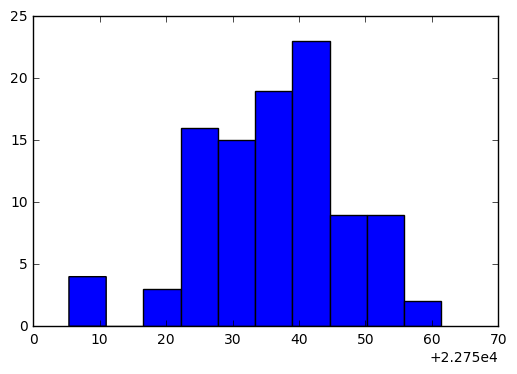

In [169]:
plt.hist(spend_random)

/Users/chenbo/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


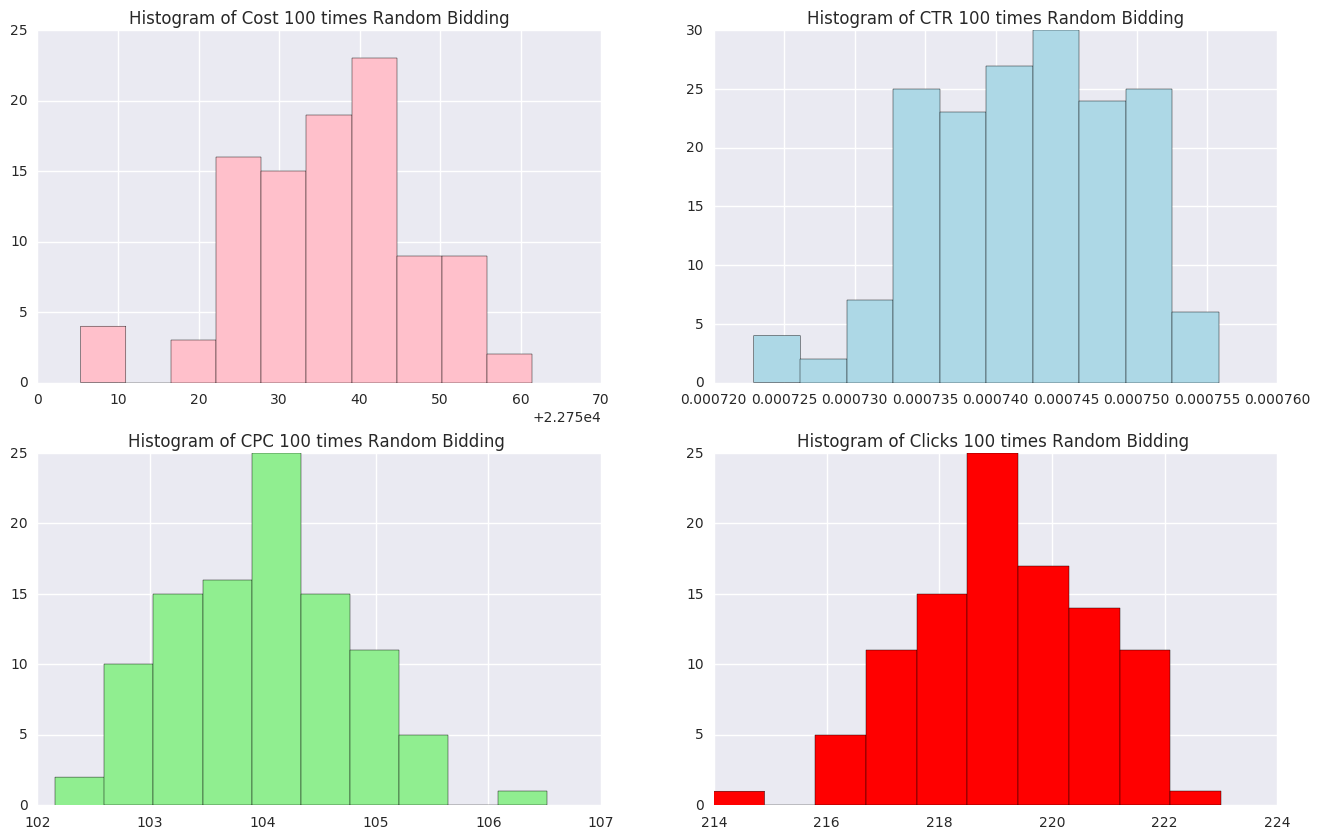

In [181]:
import seaborn as sns

fig=plt.figure(figsize=(16,10), dpi=1600)
alpha_level=0.65

ax1=fig.add_subplot(221)
plt.hist(cost,color='pink')
plt.title('Histogram of Cost 100 times Random Bidding')

ax2=fig.add_subplot(222)
plt.hist(ctr,color='lightblue')
plt.title('Histogram of CTR 100 times Random Bidding')
          
ax3=fig.add_subplot(223)
plt.hist(cpc,color='lightgreen')
plt.title('Histogram of CPC 100 times Random Bidding ')
#fit.lognormal.plot_ccdf(ax = fig4, color = 'g', linestyle ='--')

ax4=fig.add_subplot(224)
plt.hist(clicks,color='red')
plt.title('Histogram of Clicks 100 times Random Bidding ')
plt.legend()

(array([  4.,   4.,  10.,  12.,  10.,  14.,  25.,  10.,   8.,   3.]),
 array([ 27276.267 ,  27295.7212,  27315.1754,  27334.6296,  27354.0838,
         27373.538 ,  27392.9922,  27412.4464,  27431.9006,  27451.3548,
         27470.809 ]),
 <a list of 10 Patch objects>)

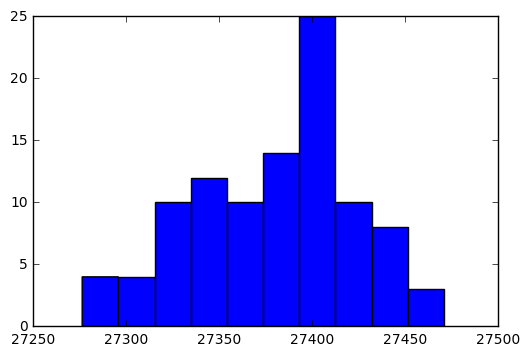

In [15]:
plt.hist(spend_random)

In [26]:
import random

random_list= []

for i in range(0,100):
    random_list.append([random.choice(range(250,270,1)) for _ in range(len(val))])
  

In [27]:
output_random =[]
for ran in random_list:
    output_random.append(validation(ran))

In [28]:
ctr_random=[]
spend_random=[]
for out in output_random:
    ctr_random.append(out[0])
    spend_random.append(out[1])

(array([  2.,   5.,   3.,  13.,   2.,  18.,   5.,  33.,   2.,  17.]),
 array([ 0.00066594,  0.00067014,  0.00067433,  0.00067853,  0.00068273,
         0.00068692,  0.00069112,  0.00069532,  0.00069951,  0.00070371,
         0.00070791]),
 <a list of 10 Patch objects>)

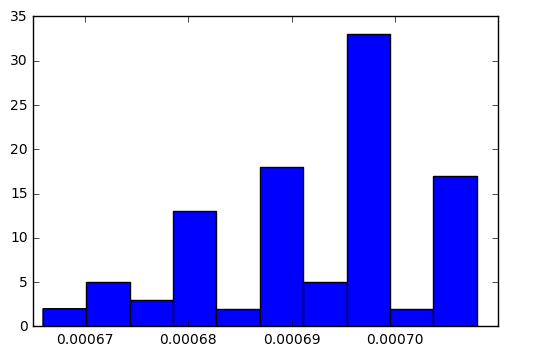

In [29]:
plt.hist(ctr_random)

(array([  2.,   4.,  12.,  13.,  22.,  13.,  13.,  12.,   6.,   3.]),
 array([ 28628.017,  28633.351,  28638.685,  28644.019,  28649.353,
         28654.687,  28660.021,  28665.355,  28670.689,  28676.023,
         28681.357]),
 <a list of 10 Patch objects>)

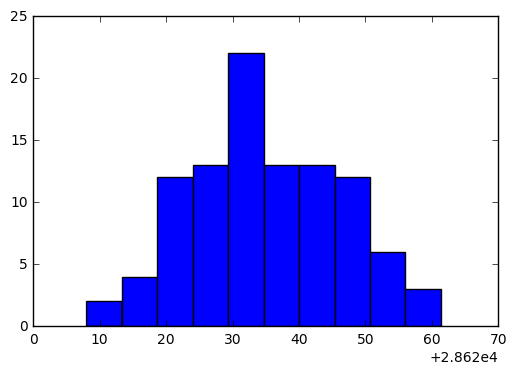

In [30]:
plt.hist(spend_random)

In [ ]:
(23.48/6.36)**0.25